In [41]:
import numpy as np

# Small dataset: [Car Age, Mileage, Fuel Type (0=Petrol, 1=Diesel), Price Category (0=Low, 1=High)]
data = np.array([
    [3, 22000, 1, 1],
    [6, 75000, 0, 0],
    [2, 14000, 1, 1],
    [8, 85000, 0, 0],
    [4, 50000, 1, 1]
])


In [ ]:
# Splitting features and labels
X = data[:, :-1].astype(float)  # Features (Car Age, Mileage, Fuel Type)
y = data[:, -1]   # Labels (Price Category)

#  Normalization
X[:, 1] = (X[:, 1] - np.mean(X[:, 1])) / np.std(X[:, 1])

In [ ]:
#  prior probabilities
p_high = np.sum(y == 1) / len(y)
p_low = np.sum(y == 0) / len(y)

var_smoothing = 1e-6

In [ ]:

mean_high = np.mean(X[y == 1], axis=0)
var_high = np.var(X[y == 1], axis=0) + var_smoothing

mean_low = np.mean(X[y == 0], axis=0)
var_low = np.var(X[y == 0], axis=0) + var_smoothing


In [ ]:

def gaussian_pdf(x, mean, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x - mean) ** 2) / (2 * var))

In [ ]:

def predict(X_test):
    predictions = []
    for x in X_test:
        # Calculate likelihood
        p_x_given_high = np.prod(gaussian_pdf(x, mean_high, var_high))
        p_x_given_low = np.prod(gaussian_pdf(x, mean_low, var_low))

        # Compute posterior probabilities
        p_high_given_x = p_x_given_high * p_high
        p_low_given_x = p_x_given_low * p_low

        # Predict the class with higher probability
        predictions.append(1 if p_high_given_x > p_low_given_x else 0)
    return np.array(predictions)

In [ ]:

y_pred = predict(X)

In [ ]:

TP = np.sum((y == 1) & (y_pred == 1))
FP = np.sum((y == 0) & (y_pred == 1))
TN = np.sum((y == 0) & (y_pred == 0))
FN = np.sum((y == 1) & (y_pred == 0))


In [ ]:

accuracy = (TP + TN) / (TP + FP + TN + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0


In [ ]:

print("Naïve Bayes Evaluation Metrics:")
print(f"Confusion Matrix: TP={TP}, FP={FP}, TN={TN}, FN={FN}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1_score:.2f}")

Naïve Bayes Evaluation Metrics:
Confusion Matrix: TP=3, FP=0, TN=2, FN=0
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


In [ ]:

print("\nManual Calculations:")
print(f"Prior Probability P(High): {p_high:.2f}, P(Low): {p_low:.2f}")
print(f"Mean for High Price Class: {mean_high}")
print(f"Variance for High Price Class: {var_high}")
print(f"Mean for Low Price Class: {mean_low}")
print(f"Variance for Low Price Class: {var_low}")


Manual Calculations:
Prior Probability P(High): 0.60, P(Low): 0.40
Mean for High Price Class: [ 3.         -0.73269811  1.        ]
Variance for High Price Class: [6.66667667e-01 3.03329693e-01 1.00000000e-06]
Mean for Low Price Class: [7.         1.09904716 0.        ]
Variance for Low Price Class: [1.00000100e+00 3.18335354e-02 1.00000000e-06]


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

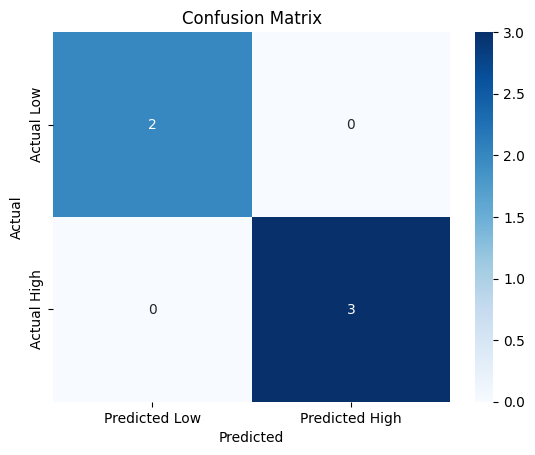

In [ ]:

conf_matrix = np.array([[TN, FP], [FN, TP]])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Low', 'Predicted High'], yticklabels=['Actual Low', 'Actual High'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()